In [1]:
from __future__ import division 
import matplotlib.pyplot as plt
%matplotlib inline
import emotion_analysis
emo = emotion_analysis.EmotionAnalysis()

In [2]:
inp, lab = emo.prepare_dataset_per_frame('tess_data')

Skipping audio file 'tess_data\YAF_germ_angry.wav.wav'
Read audio file 'tess_data\OAF_nag_neutral.wav.wav', count: 100
Read audio file 'tess_data\YAF_walk_ps.wav.wav', count: 200
Read audio file 'tess_data\OAF_boat_ps.wav.wav', count: 300
Read audio file 'tess_data\YAF_lore_disgust.wav.wav', count: 400
Read audio file 'tess_data\OAF_neat_angry.wav.wav', count: 500
Read audio file 'tess_data\OAF_third_sad.wav.wav', count: 600
Read audio file 'tess_data\YAF_book_fear.wav.wav', count: 700
Read audio file 'tess_data\OAF_mob_ps.wav.wav', count: 800
Read audio file 'tess_data\OAF_tough_disgust.wav.wav', count: 900
Read audio file 'tess_data\YAF_wife_sad.wav.wav', count: 1000
Read audio file 'tess_data\OAF_kill_ps.wav.wav', count: 1100
Read audio file 'tess_data\OAF_soap_neutral.wav.wav', count: 1200
Read audio file 'tess_data\YAF_mood_fear.wav.wav', count: 1300
Read audio file 'tess_data\YAF_rough_ps.wav.wav', count: 1400
Read audio file 'tess_data\OAF_lean_angry.wav.wav', count: 1500
Read a

In [3]:
from collections import Counter
Counter(lab)

Counter({'negative': 168827, 'neutral': 81618, 'positive': 158529})

In [4]:
#from random import shuffle
import numpy as np
#dataset = zip(inp, lab)
#shuffle(dataset)
#inp, lab = zip(*dataset)
max_value = max([max(i) for i in inp])
min_value = min([min(i) for i in inp])

#inp = inp[:100000]
#lab = lab[:100000]

#normalised_inp = np.asarray(inp)/max_value
inp = (np.asarray(inp)-min_value)/(max_value-min_value)

In [5]:
from pybrain.structure.modules import LSTMLayer, SoftmaxLayer, TanhLayer
from pybrain.supervised import RPropMinusTrainer, BackpropTrainer
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SequenceClassificationDataSet, ClassificationDataSet

In [6]:
lab_to_int = {'neutral':0, 'positive':1, 'negative':2}
int_to_lab = {0:'neutral', 1:'positive', 2:'negative'}
traindata = ClassificationDataSet(len(inp[0]), 1, nb_classes = 3)
#for i in range(int(len(inp)*3/4)):
for i in range(int(len(inp))):
    traindata.addSample(inp[i],lab_to_int[lab[i]])

In [7]:
traindata._convertToOneOfMany()

In [8]:
rnn = buildNetwork(traindata.indim, 10, traindata.outdim, hiddenclass = LSTMLayer, outclass = SoftmaxLayer, recurrent = True)
trainer = RPropMinusTrainer(rnn, dataset = traindata, verbose = True)
error = []
#counter = 0

In [9]:
for i in range(10):
    #print "Epoch: "+str(counter)
    error.append(trainer.train())
    #print ""
    #counter += 1

epoch      0  total error      0.18321   avg weight        1.0449
epoch      1  total error      0.11702   avg weight        1.0463
epoch      2  total error      0.12731   avg weight        1.0503
epoch      3  total error      0.14638   avg weight        1.0457
epoch      4  total error      0.11312   avg weight        1.0474
epoch      5  total error      0.11788   avg weight        1.0486
epoch      6  total error       0.1255   avg weight        1.0532
epoch      7  total error      0.10818   avg weight        1.0552
epoch      8  total error      0.11599   avg weight        1.0547
epoch      9  total error      0.10846   avg weight        1.0543


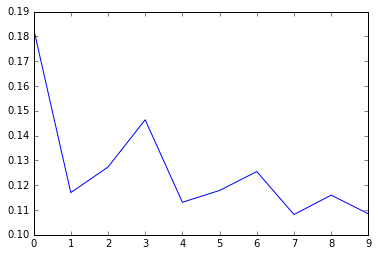

In [10]:
x=[i for i in range(len(error))]
plt.plot(x, error)
plt.show()

In [11]:
import feature_extractor
import scipy.io.wavfile as wav
import math

extractor = feature_extractor.FeatureExtractor()

def final_result(audio_signal):
    all_result = []
    for frame_feature in extractor.extract_features_per_frame(audio_signal = audio_signal):
        frame_feature = (np.asarray(frame_feature)-min_value)/(max_value-min_value)
        frame_result = int_to_lab[rnn.activate(frame_feature).argmax()]
        all_result.append(frame_result)
    label_counts = Counter(all_result)
    print label_counts
    return max(label_counts, key = label_counts.get)

In [24]:
from os import listdir
from os.path import isfile, join
import scipy.io.wavfile as wav
from random import shuffle

path = 'tess_data'

y_pred=[]
y_actual=[]

audio_files = [f for f in listdir(path) if isfile(join(path, f))]
shuffle(audio_files)
for audio_file in audio_files[:100]:
    y_pred.append(final_result(audio_signal = wav.read(join(path, audio_file))))
    y_actual.append(audio_file.split('_')[2].split('.')[0])

Counter({'negative': 180, 'positive': 17})
Counter({'negative': 153})
Counter({'negative': 240, 'positive': 5})
Counter({'negative': 268, 'positive': 6})
Counter({'negative': 158})
Counter({'negative': 202})
Counter({'negative': 193, 'positive': 7})
Counter({'negative': 183, 'positive': 17})
Counter({'negative': 193, 'positive': 43})
Counter({'negative': 211})
Counter({'negative': 144, 'positive': 2})
Counter({'negative': 174})
Counter({'negative': 210, 'positive': 17})
Counter({'negative': 247, 'positive': 3})
Counter({'negative': 192, 'positive': 15})
Counter({'negative': 256})
Counter({'negative': 201, 'positive': 9})
Counter({'negative': 234})
Counter({'negative': 187, 'positive': 1})
Counter({'negative': 144})
Counter({'negative': 236})
Counter({'negative': 255, 'positive': 3})
Counter({'negative': 259, 'positive': 23})
Counter({'negative': 196})
Counter({'negative': 150})
Counter({'negative': 193})
Counter({'negative': 225, 'positive': 4})
Counter({'negative': 152})
Counter({'neg

In [25]:
import sys
sys.getsizeof(trainer)

32

In [26]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, _ = precision_recall_fscore_support(y_actual, y_pred, labels=['neutral','positive','negative'])
print "Precision = "+str(precision)+"\nRecall = "+str(recall)+"\nF1 Score = "+str(f1_score)

Precision = [ 0.  0.  0.]
Recall = [ 0.  0.  0.]
F1 Score = [ 0.  0.  0.]


In [27]:
file_name = raw_input("Enter the name of the call file name.\n> ")
rate_sig, sig = wav.read(file_name)

plt.plot(sig)
plt.plot((0,len(sig)),(0,0),'g')
plt.show()

complete_call_result = final_result(audio_signal = (rate_sig, sig))
first_half_result = final_result(audio_signal = (rate_sig, sig[:int(len(sig)/2)]))
second_half_result = final_result(audio_signal = (rate_sig, sig[int(len(sig)/2):]))
segment_result = []
for i in range(int(math.ceil(len(sig)/(rate_sig*20)))):
    segment_result.append(final_result(audio_signal = (rate_sig, sig[i*rate_sig*20:i*rate_sig*20+rate_sig*20])))

Enter the name of the call file name.
> 


IOError: [Errno 22] invalid mode ('rb') or filename: ''

In [28]:
import numpy as np
from __future__ import division
print "Overall call result: "+complete_call_result
print "Trainsition: "+first_half_result+" --> "+second_half_result
map_dict = {'negative':-1, 'neutral':0, 'positive':1}
mapped_segment_result = [map_dict[result] for result in segment_result]
index = [i for i in range(len(mapped_segment_result))]
index = np.asarray(index)
bar_width = 1
plt.plot((0,index[-1]+1),((0,0)), 'r')
plt.bar(index, mapped_segment_result, bar_width)
plt.xticks(index + bar_width/2 , (str(i*20)+'-'+str((i+1)*20) for i in index))
plt.xlabel('Time series with 20 seconds chunk')
#plt.axes([0, 100, -2, 2])
plt.ylabel('Emotion:\n1 = positive\n0 = neutral\n-1 = negative')
plt.title('Emotion per 20 second segment')
plt.show()

NameError: name 'complete_call_result' is not defined

In [29]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(cm))
    plt.xticks(tick_marks, ['neutral','positive','negative'], rotation=45)
    plt.yticks(tick_marks, ['neutral','positive','negative'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 0  0 15]
 [ 0  0  0]
 [ 0  0  0]]


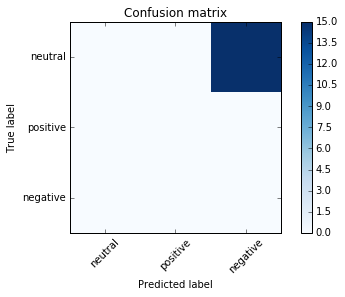

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual, y_pred, labels=['neutral','positive','negative'])
print cm
plot_confusion_matrix(cm)

In [31]:
len([1 for i in range(len(y_pred)) if y_pred[i]==y_actual[i]])/float(len(y_pred))

0.0

In [32]:
lab[1] 

'positive'